In [1]:
from bayesClassifier import *

Building prefix dict from the default dictionary ...
Loading model from cache c:\users\zhaoke\appdata\local\temp\jieba.cache
Loading model cost 0.334 seconds.
Prefix dict has been built succesfully.


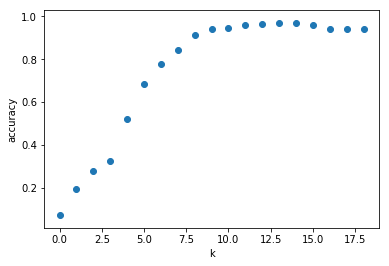

In [2]:
#加载数据
dataset = load_files('./test_file2')
#对数据进行分词处理
datasets = []
for i in dataset.data:
    datasets.append(' '.join([j for j in jieba.cut(i)]))        #训练数据
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
ks = [1, 2, 3, 5, 10, 20, 30, 50, 100, 200, 300, 500, 1000, 2000, 
      3000, 5000, 10000, 20000, 'all']
accuracys = []
for k in ks:
    classifier = bayesClassifier(MultinomialNB, k=k)
    clf = make_pipeline(classifier)
    accuracys.append(\
        average(cross_val_score(clf, datasets, dataset.target, cv=cv)))
fig, ax = plt.subplots()
ax.scatter(range(len(ks)), accuracys)
ks[-1] = 25000
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
plt.show()